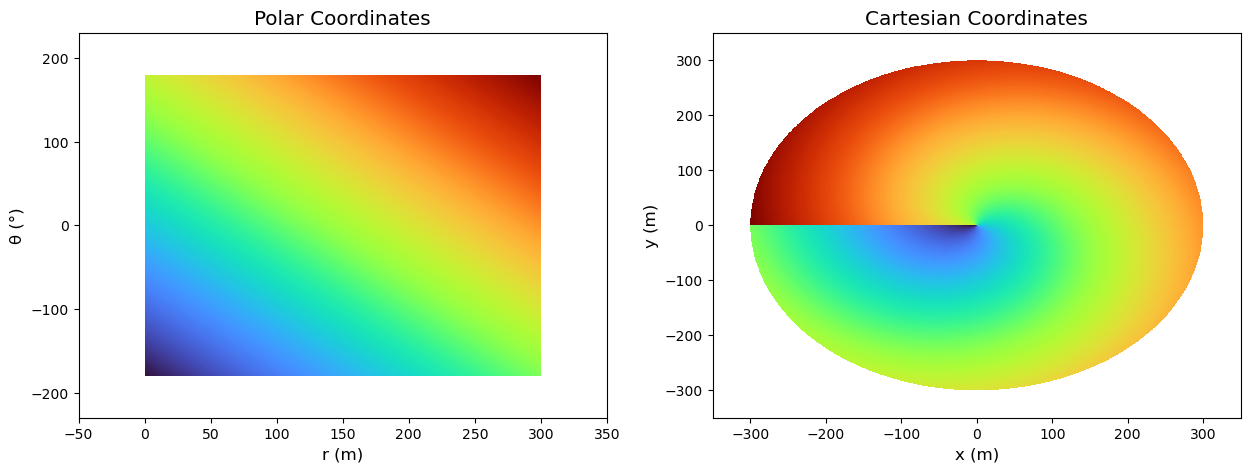

In [1]:
def polar_to_cartesian():
    """极坐标系重投影到笛卡尔坐标系"""
    import matplotlib.pyplot as plt
    import numpy as np

    from reproject_grid import RegularGrid, reproject

    shape = (1000, 1000)
    grid1 = RegularGrid(shape, (0, 300, -180, 180))
    grid2 = RegularGrid(shape, (-300, 300, -300, 300))

    def xy_to_rt(x, y):
        r = np.hypot(x, y)
        t = np.arctan2(y, x)
        t = np.degrees(t)

        return r, t

    indices, inside = reproject(grid1, grid2, xy_to_rt)
    Z1 = grid1.X + grid1.Y
    Z2 = Z1[indices]
    Z2[~inside] = np.nan

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_xlim(-50, 350)
    axes[0].set_ylim(-230, 230)
    axes[0].pcolormesh(grid1.x, grid1.y, Z1, cmap="turbo")
    axes[0].set_xlabel("r (m)", fontsize="large")
    axes[0].set_ylabel("θ (°)", fontsize="large")
    axes[0].set_title("Polar Coordinates", fontsize="x-large")

    axes[1].set_xlim(-350, 350)
    axes[1].set_ylim(-350, 350)
    axes[1].pcolormesh(grid2.x, grid2.y, Z2, cmap="turbo")
    axes[1].set_xlabel("x (m)", fontsize="large")
    axes[1].set_ylabel("y (m)", fontsize="large")
    axes[1].set_title("Cartesian Coordinates", fontsize="x-large")

    plt.show()


polar_to_cartesian()

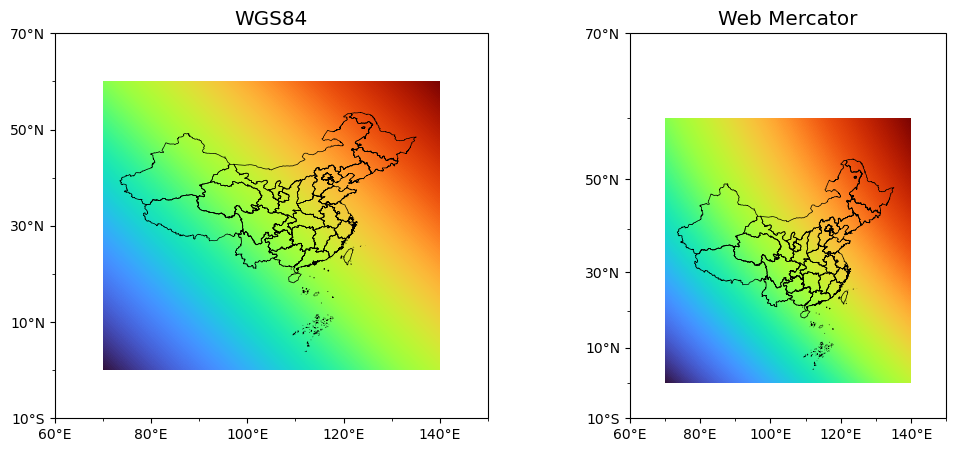

In [2]:
def wgs84_to_webmerc():
    """WGS84 重投影到网络墨卡托"""
    from functools import partial

    import frykit.plot as fplt
    import matplotlib.pyplot as plt
    import numpy as np
    from pyproj import Proj

    from reproject_grid import RegularGrid, reproject, transform_extent

    proj = Proj("+proj=webmerc")

    shape = (1000, 1000)
    grid1 = RegularGrid(shape, (70, 140, 0, 60))
    grid2 = RegularGrid(shape, transform_extent(grid1.extents, proj))
    indices, inside = reproject(grid1, grid2, partial(proj, inverse=True))

    Z1 = grid1.X + grid1.Y
    Z2 = Z1[indices]
    Z2[~inside] = np.nan

    crs1 = fplt.PLATE_CARREE
    crs2 = fplt.WEB_MERCATOR

    fig = plt.figure(figsize=(15, 5))
    fig.subplots_adjust(wspace=-0.2)

    ax1 = fig.add_subplot(121, projection=crs1)
    ax2 = fig.add_subplot(122, projection=crs2)
    for ax in [ax1, ax2]:
        fplt.add_cn_province(ax)
        fplt.set_map_ticks(ax, (60, 150, -10, 70), dx=20, dy=20, mx=1, my=1)

    # transform=None 使 cartopy 不做投影变换
    ax1.pcolormesh(grid1.x, grid1.y, Z1, cmap="turbo", transform=None)
    ax1.set_title("WGS84", fontsize="x-large")

    ax2.pcolormesh(grid2.x, grid2.y, Z2, cmap="turbo", transform=None)
    ax2.set_title("Web Mercator", fontsize="x-large")

    plt.show()


wgs84_to_webmerc()

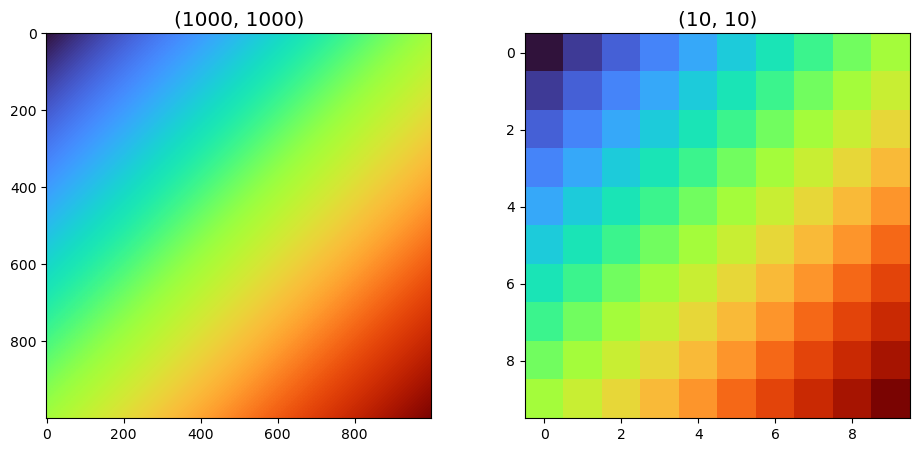

In [3]:
def resize_image():
    """用重投影调整图片大小，效果类似 PIL 的 resize"""
    import matplotlib.pyplot as plt
    import numpy as np

    from reproject_grid import resize

    shape1 = (1000, 1000)
    shape2 = (10, 10)
    indices = resize(shape1, shape2)

    x = np.arange(shape1[0])
    y = np.arange(shape1[1])
    Z1 = x[:, np.newaxis] + y
    Z2 = Z1[indices]

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.subplots_adjust(wspace=-0.3)

    axes[0].imshow(Z1, cmap="turbo", interpolation="none")
    axes[0].set_title("(1000, 1000)", fontsize="x-large")

    axes[1].imshow(Z2, cmap="turbo", interpolation="none")
    axes[1].set_title("(10, 10)", fontsize="x-large")

    plt.show()


resize_image()